## Getting files and blasting

*** Download a FASTA file containing the protein gene models for the spotted gar
genome, transfer to HPC ***

```
$ ftp ftp://ftp.ensembl.org/pub/release-89/fasta/tetraodon_nigroviridis/pep/Tetraodon_nigroviridis.TETRAODON8.pep.all.fa.gz
$ scp Tetraodon_nigroviridis.TETRAODON8.pep.all.fa.gz kkinning@hpc-ln1.uoregon.edu:ass3/
```

*** Construct a BLAST database for each of the protein sets using makeblastdb ***

```
$ makeblastdb -in Lepisosteus_oculatus.LepOcu1.pep.all.fa -dbtype prot
$ makeblastdb -in Gasterosteus_aculeatus.BROADS1.pep.all.fa -dbtype -prot
$ makeblastdb -in Tetraodon_nigroviridis.TETRAODON8.pep.all.fa -dbtype -prot
```

*** Execute BLASTP using gar proteins as the query and puffer as the subject database. Do it for all pairs. These are the commands to put in to the .srun script ***

```
cat Lepisosteus_oculatus.LepOcu1.pep.all.fa | blastp -db Gasterosteus_aculeatus.BROADS1.pep.all.fa -evalue 1e-5 -max_target_seqs 1 -num_threads 11 -outfmt '6 qseqid qlen sseqid slen pident nident length mismatch qstart qend sstart send evalue bitscore' -out garVSpuff.out.tsv
```

```
cat Lepisosteus_oculatus.LepOcu1.pep.all.fa | blastp -db Tetraodon_nigroviridis.TETRAODON8.pep.all.fa -evalue 1e-5 -max_target_seqs 1 -num_threads 11 -outfmt '6 qseqid qlen sseqid slen pident nident length mismatch qstart qend sstart send evalue bitscore' -out garVSstickle.out.tsv
```

```
cat Tetraodon_nigroviridis.TETRAODON8.pep.all.fa | blastp -db Lepisosteus_oculatus.LepOcu1.pep.all.fa -evalue 1e-5 -max_target_seqs 1 -num_threads 11 -outfmt '6 qseqid qlen sseqid slen pident nident length mismatch qstart qend sstart send evalue bitscore' -out stickleVSgar.out.tsv
```

```
cat Tetraodon_nigroviridis.TETRAODON8.pep.all.fa | blastp -db Gasterosteus_aculeatus.BROADS1.pep.all.fa -evalue 1e-5 -max_target_seqs 1 -num_threads 11 -outfmt '6 qseqid qlen sseqid slen pident nident length mismatch qstart qend sstart send evalue bitscore' -out stickleVSpuff.out.tsv
```

```
cat Gasterosteus_aculeatus.BROADS1.pep.all.fa | blastp -db Lepisosteus_oculatus.LepOcu1.pep.all.fa -evalue 1e-5 -max_target_seqs 1 -num_threads 11 -outfmt '6 qseqid qlen sseqid slen pident nident length mismatch qstart qend sstart send evalue bitscore' -out puffVSgar.out.tsv
```

```
cat Gasterosteus_aculeatus.BROADS1.pep.all.fa | blastp -db Tetraodon_nigroviridis.TETRAODON8.pep.all.fa -evalue 1e-5 -max_target_seqs 1 -num_threads 11 -outfmt '6 qseqid qlen sseqid slen pident nident length mismatch qstart qend sstart send evalue bitscore' -out puffVSstickle.out.tsv
```

** Re-naming, fixing mistake **

```
Lepisosteus_oculatus.LepOcu1.pep.all.fa --> Gasterosteus_aculeatus.BROADS1.pep.all.fa garVSpuff.out.tsv  BlastResults/garVSstickle.out.tsv
```

```
Lepisosteus_oculatus.LepOcu1.pep.all.fa --> Tetraodon_nigroviridis.TETRAODON8.pep.all.fa garVSstickle.out.tsv BlastResults/garVSpuff.out.tsv
```

```
Tetraodon_nigroviridis.TETRAODON8.pep.all.fa --> Lepisosteus_oculatus.LepOcu1.pep.all.fa stickleVSgar.out.tsv BlastResults/puffVSgar.out.tsv
```

```
Tetraodon_nigroviridis.TETRAODON8.pep.all.fa --> Gasterosteus_aculeatus.BROADS1.pep.all.fa  stickleVSpuff.out.tsv BlastResults/puffVSstickle.out.tsv
```

```
Gasterosteus_aculeatus.BROADS1.pep.all.fa --> Lepisosteus_oculatus.LepOcu1.pep.all.fa puffVSgar.out.tsv BlastResults/stickleVSgar.out.tsv
```

```
Gasterosteus_aculeatus.BROADS1.pep.all.fa --> Tetraodon_nigroviridis.TETRAODON8.pep.all.fa  puffVSstickle.out.tsv BlastResults/stickleVSpuff.out.tsv
```

## Reciprocal best hit

In [37]:
garVSpuff = read.table("garVSpuff.out.tsv", sep = "\t")
garVSstickle = read.table("garVSstickle.out.tsv", sep = "\t")
puffVSgar = read.table("puffVSgar.out.tsv", sep = "\t")
puffVSstickle = read.table("puffVSstickle.out.tsv", sep = "\t")
stickleVSgar = read.table("stickleVSgar.out.tsv", sep = "\t")
stickleVSpuff = read.table("stickleVSpuff.out.tsv", sep = "\t")

In [38]:
names = c("queryID", "queryLen", "subID", "subLen", "ident", "alignLen", "mismatches", "openings", "qStart", "qEnd", "sStart", "sEnd", "eVal", "bitScore")

In [39]:
colnames(garVSpuff) = names
colnames(garVSstickle) = names
colnames(puffVSgar) = names
colnames(puffVSstickle) = names
colnames(stickleVSgar) = names
colnames(stickleVSpuff) = names

*** Create a new column in both data frames that contains an ID for each query-hit combination ***

In [40]:
garVSpuff$combID = paste(garVSpuff$queryID, garVSpuff$subID, sep = "_")
puffVSgar$combID = paste(puffVSgar$subID, puffVSgar$queryID, sep = "_")

garVSstickle$combID = paste(garVSstickle$queryID, garVSstickle$subID, sep = "_")
stickleVSgar$combID = paste(stickleVSgar$subID, stickleVSgar$queryID, sep = "_")

puffVSstickle$combID = paste(puffVSstickle$queryID, puffVSstickle$subID, sep = "_")
stickleVSpuff$combID = paste(stickleVSpuff$subID, stickleVSpuff$queryID, sep = "_")

*** Get the intersecting rows of the two data frames, and therefore the RBBHs. How many rows (RBBH orthologs) are there for each species pair? Using head(), print the first 5 rows of each of your 3 RBBH data frames ***

** Gar and pufferfish combination **

In [41]:
garVSpuff_RBH = merge(garVSpuff, puffVSgar, by = "combID")

In [51]:
nrow(garVSpuff_RBH)

[1] 12291

In [52]:
head(garVSpuff_RBH)

combID,queryID.x,queryLen.x,subID.x,subLen.x,ident.x,alignLen.x,mismatches.x,openings.x,qStart.x,⋯,ident.y,alignLen.y,mismatches.y,openings.y,qStart.y,qEnd.y,sStart.y,sEnd.y,eVal.y,bitScore.y
ENSLOCP00000000001.1_ENSTNIP00000006678.1,ENSLOCP00000000001.1,368,ENSTNIP00000006678.1,369,76.92,280,364,82,1,⋯,76.92,280,364,82,1,362,1,364,0e+00,596
ENSLOCP00000000005.1_ENSTNIP00000008370.1,ENSLOCP00000000005.1,618,ENSTNIP00000008370.1,852,82.90,320,386,51,1,⋯,94.44,289,306,17,1,306,1,306,0e+00,576
ENSLOCP00000000006.1_ENSTNIP00000012440.1,ENSLOCP00000000006.1,313,ENSTNIP00000012440.1,338,73.80,231,313,82,1,⋯,73.80,231,313,82,26,338,1,313,5e-180,505
ENSLOCP00000000008.1_ENSTNIP00000010908.1,ENSLOCP00000000008.1,509,ENSTNIP00000010908.1,511,83.75,433,517,60,1,⋯,83.75,433,517,60,1,506,1,504,0e+00,822
ENSLOCP00000000010.1_ENSTNIP00000010906.1,ENSLOCP00000000010.1,149,ENSTNIP00000010906.1,199,51.01,76,149,62,3,⋯,51.01,76,149,62,59,198,3,149,6e-38,131
ENSLOCP00000000011.1_ENSTNIP00000019160.1,ENSLOCP00000000011.1,390,ENSTNIP00000019160.1,388,65.64,256,390,130,1,⋯,67.74,252,372,116,21,388,19,390,2e-177,503


** Gar and stickleback combination **

In [44]:
garVSstickle_RBH = merge(garVSstickle, stickleVSgar, by = "combID")

In [53]:
nrow(garVSstickle_RBH)

[1] 13094

In [46]:
head(garVSstickle_RBH)

combID,queryID.x,queryLen.x,subID.x,subLen.x,ident.x,alignLen.x,mismatches.x,openings.x,qStart.x,⋯,ident.y,alignLen.y,mismatches.y,openings.y,qStart.y,qEnd.y,sStart.y,sEnd.y,eVal.y,bitScore.y
ENSLOCP00000000001.1_ENSGACP00000013354.1,ENSLOCP00000000001.1,368,ENSGACP00000013354.1,357,78.06,281,360,75,1,⋯,78.06,281,360,75,1,357,1,359,0e+00,589.0
ENSLOCP00000000004.1_ENSGACP00000007080.1,ENSLOCP00000000004.1,215,ENSGACP00000007080.1,218,76.64,164,214,50,1,⋯,76.64,164,214,50,5,218,1,214,2e-122,350.0
ENSLOCP00000000005.1_ENSGACP00000015206.1,ENSLOCP00000000005.1,618,ENSGACP00000015206.1,859,84.74,261,308,40,1,⋯,84.74,261,308,40,1,303,1,306,6e-165,497.0
ENSLOCP00000000006.1_ENSGACP00000022751.1,ENSLOCP00000000006.1,313,ENSGACP00000022751.1,338,78.21,244,312,68,1,⋯,78.21,244,312,68,26,337,1,312,0e+00,518.0
ENSLOCP00000000008.1_ENSGACP00000015192.1,ENSLOCP00000000008.1,509,ENSGACP00000015192.1,508,82.43,427,518,66,1,⋯,82.21,425,517,69,1,507,1,504,0e+00,801.0
ENSLOCP00000000010.1_ENSGACP00000015211.1,ENSLOCP00000000010.1,149,ENSGACP00000015211.1,98,41.51,44,106,51,46,⋯,41.51,44,106,51,1,97,46,149,1e-14,66.6


** Pufferfish and sticklback combination **

In [47]:
puffVSstickle_RBH = merge(puffVSstickle, stickleVSpuff, by = "combID")

In [54]:
nrow(puffVSstickle_RBH)

[1] 14623

In [48]:
head(puffVSstickle_RBH)

combID,queryID.x,queryLen.x,subID.x,subLen.x,ident.x,alignLen.x,mismatches.x,openings.x,qStart.x,⋯,ident.y,alignLen.y,mismatches.y,openings.y,qStart.y,qEnd.y,sStart.y,sEnd.y,eVal.y,bitScore.y
ENSTNIP00000000004.1_ENSGACP00000025030.1,ENSTNIP00000000004.1,705,ENSGACP00000025030.1,708,87.50,623,712,78,1,⋯,87.50,623,712,78,1,708,1,705,0e+00,1256
ENSTNIP00000000005.1_ENSGACP00000002858.1,ENSTNIP00000000005.1,272,ENSGACP00000002858.1,282,63.97,174,272,97,1,⋯,63.97,174,272,97,1,271,1,272,1e-131,378
ENSTNIP00000000007.1_ENSGACP00000022871.1,ENSTNIP00000000007.1,1057,ENSGACP00000022871.1,1046,85.08,901,1059,143,1,⋯,85.08,901,1059,143,1,1046,1,1057,0e+00,1831
ENSTNIP00000000008.1_ENSGACP00000014423.1,ENSTNIP00000000008.1,108,ENSGACP00000014423.1,108,84.11,90,107,17,1,⋯,84.11,90,107,17,1,107,1,107,8e-65,194
ENSTNIP00000000009.1_ENSGACP00000025969.1,ENSTNIP00000000009.1,843,ENSGACP00000025969.1,846,87.98,732,832,95,14,⋯,87.40,735,841,101,5,843,5,842,0e+00,1479
ENSTNIP00000000011.1_ENSGACP00000005818.1,ENSTNIP00000000011.1,522,ENSGACP00000005818.1,346,79.42,220,277,57,246,⋯,79.42,220,277,57,2,278,246,522,1e-152,444


*** Briefly explain why you think the number of gar-puffer, gar-stickleback, and puffer-stickleback
orthologs are different. ***

The organisms have different levels of relatedness, we would expect their ortholog similarity to differ.

## Informative Plots

*** Plot the distributions of percent sequence identity for the stickleback-puffer and stickleback-gar RBBH orthologs side-by-side in a boxplot. Do the distributions appear to differ? Why might this be?  ***

The distributions of percent sequence identity for the puffer-stickleback and gar-stickleback RBH orthologs do differ. The puffer-stickleback distributions demonstrates that the orthologs in these individuals share a higher percent identity to eachother than the gar-stickleback othrologs.

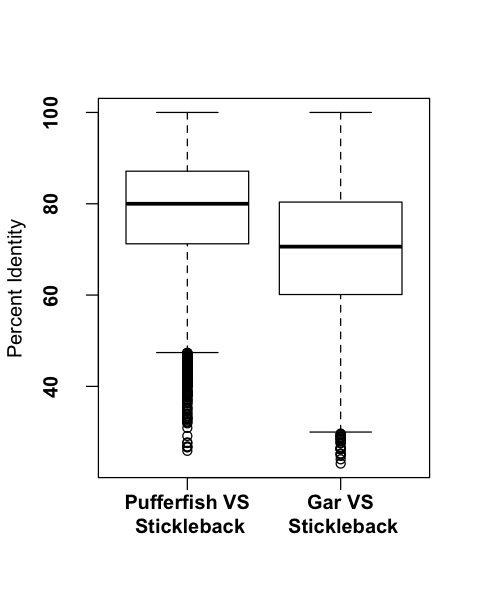

In [68]:
# pdf("claysPlots.pdf")
options(repr.plot.width = 4, repr.plot.height = 5)

par(mfrow = c(1, 1), mgp=c(3, 1.5, 0), font.axis = 2)

boxplot(puffVSstickle_RBH$ident.x, garVSstickle_RBH$ident.x, names = c("Pufferfish VS\n Stickleback", "Gar VS\n Stickleback"), ylab = "Percent Identity") 
# boxplot(garVSstickle_RBH$ident.x, garVSstickle_RBH$ident.y, names = c("Gar", "Stickleback"), ylab = "Percent Identity")
# dev.off()

*** Extract relevant information from the headers in the gar and stickleback pep.all.fa.gz files, and combine it with your gar-stickleback RBBH information to produce an orthology dot plot for gar chromosome 11.  ***